In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def shift_comparison(df, before_model, after_model, group_by='culture', metric='accuracy'):
    """
    Visualize before-after comparison for each group with bar plots showing the change.
    
    Parameters:
    - df: DataFrame with Model, Culture, Language, Bias Score, Cultural Accuracy
    - before_model: Name of the baseline model
    - after_model: Name of the comparison model
    - group_by: 'culture', 'language', or 'combo' (culture-language pair)
    - metric: 'accuracy' for Cultural Accuracy or 'bias' for Bias Score
    """
    before_data = df[df['Model'] == before_model].copy()
    after_data = df[df['Model'] == after_model].copy()
    
    # Create grouping column
    if group_by == 'culture':
        before_data['group'] = before_data['Culture']
        after_data['group'] = after_data['Culture']
        title_suffix = 'Culture'
    elif group_by == 'language':
        before_data['group'] = before_data['Language']
        after_data['group'] = after_data['Language']
        title_suffix = 'Language'
    else:  # combo
        before_data['group'] = before_data['Culture'] + '-' + before_data['Language']
        after_data['group'] = after_data['Culture'] + '-' + after_data['Language']
        title_suffix = 'Culture-Language Pair'
    
    # Select metric column
    metric_col = 'Cultural Accuracy' if metric == 'accuracy' else 'Bias Score'
    metric_label = 'Cultural Accuracy (higher is better)' if metric == 'accuracy' else 'Bias Score (closer to 0 is better)'
    
    # Aggregate by group if culture or language
    if group_by in ['culture', 'language']:
        before_grouped = before_data.groupby('group')[metric_col].mean().reset_index()
        after_grouped = after_data.groupby('group')[metric_col].mean().reset_index()
        
        merged = before_grouped.merge(after_grouped, on='group', suffixes=('_before', '_after'))
    else:
        # For combo, no aggregation needed
        merged = before_data[['group', metric_col]].merge(
            after_data[['group', metric_col]], 
            on='group', 
            suffixes=('_before', '_after')
        )
    
    # Calculate change
    merged['change'] = merged[f'{metric_col}_after'] - merged[f'{metric_col}_before']
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x_pos = range(len(merged))
    width = 0.35
    
    # Plot before and after bars
    bars1 = ax.bar([x - width/2 for x in x_pos], merged[f'{metric_col}_before'], 
                   width, label='Before', alpha=0.8, color='steelblue')
    bars2 = ax.bar([x + width/2 for x in x_pos], merged[f'{metric_col}_after'], 
                   width, label='After', alpha=0.8, color='coral')
    
    # Add change annotations
    for i, (before_val, after_val, change) in enumerate(zip(
        merged[f'{metric_col}_before'], 
        merged[f'{metric_col}_after'],
        merged['change']
    )):
        # Arrow showing direction of change
        arrow_symbol = '↑' if change > 0 else '↓' if change < 0 else '→'
        color = 'green' if (change > 0 and metric == 'accuracy') or (change < 0 and metric == 'bias') else 'red'
        ax.text(i, max(before_val, after_val) + 0.02, f'{arrow_symbol}{abs(change):.3f}', 
               ha='center', va='bottom', fontsize=8, color=color, fontweight='bold')
    
    ax.set_xlabel(title_suffix)
    ax.set_ylabel(metric_label)
    
    # Update title to indicate averaging
    avg_note = ' (Average)' if group_by in ['culture', 'language'] else ''
    ax.set_title(f'{metric_col} Change by {title_suffix}{avg_note}\n{before_model} → {after_model}')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(merged['group'], rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv('..\\single_result_table.csv')

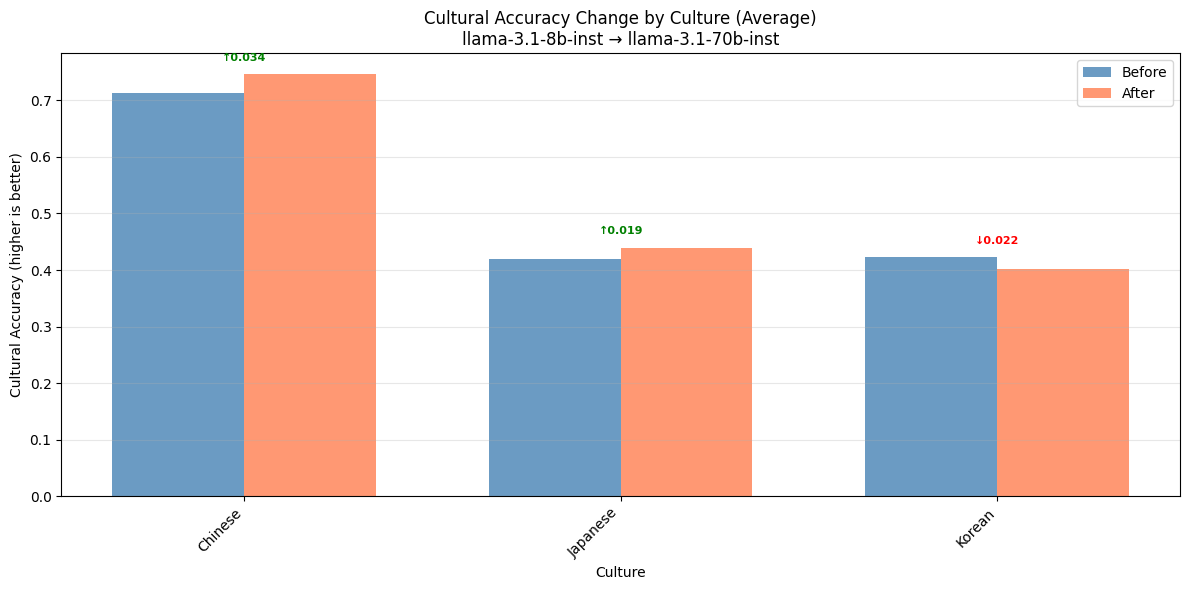

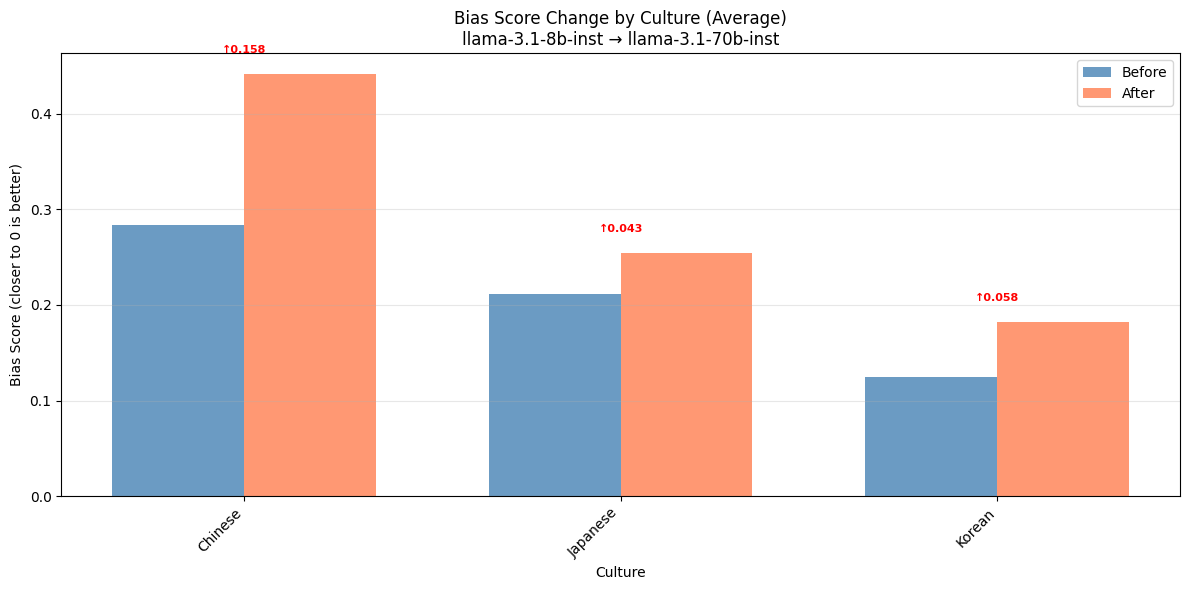

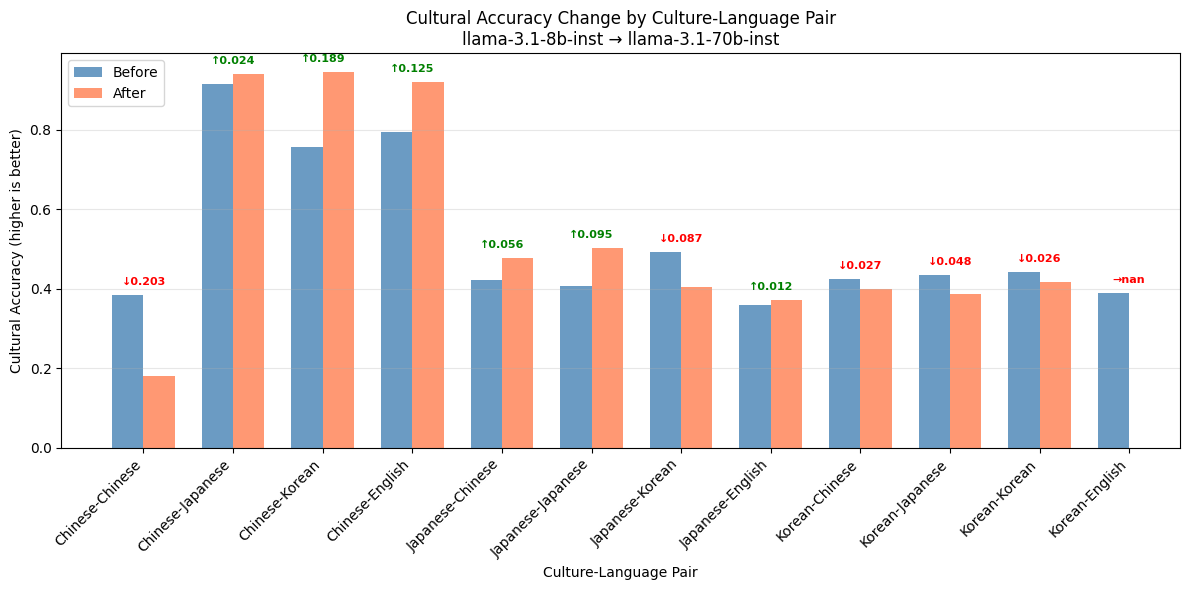

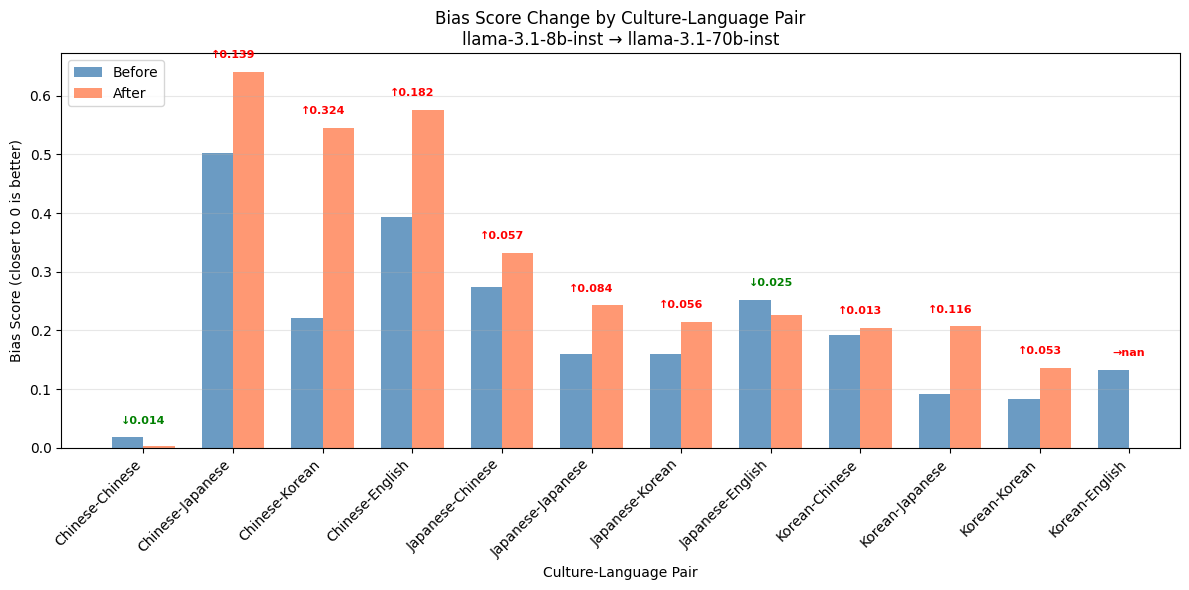

In [9]:
shift_comparison(
    df,
    before_model='llama-3.1-8b-inst',
    after_model='llama-3.1-70b-inst',
)
shift_comparison(
    df,
    before_model='llama-3.1-8b-inst',
    after_model='llama-3.1-70b-inst',
    group_by='culture',
    metric='bias',
)
shift_comparison(
    df,
    before_model='llama-3.1-8b-inst',
    after_model='llama-3.1-70b-inst',
    group_by='combo',
)
shift_comparison(
    df,
    before_model='llama-3.1-8b-inst',
    after_model='llama-3.1-70b-inst',
    group_by='combo',
    metric='bias',
)

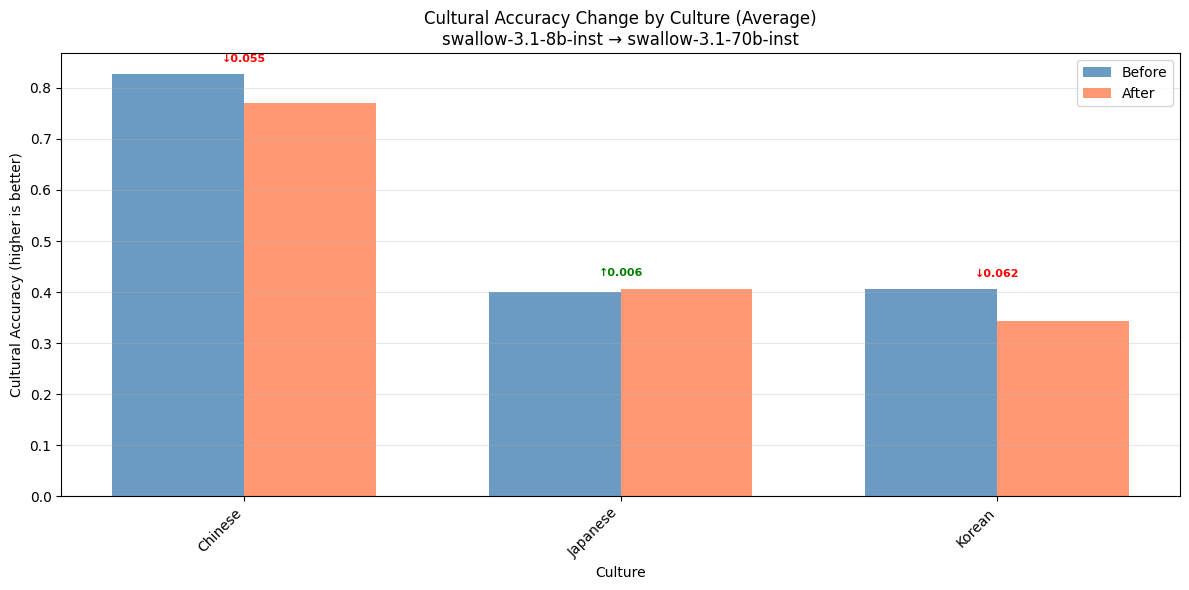

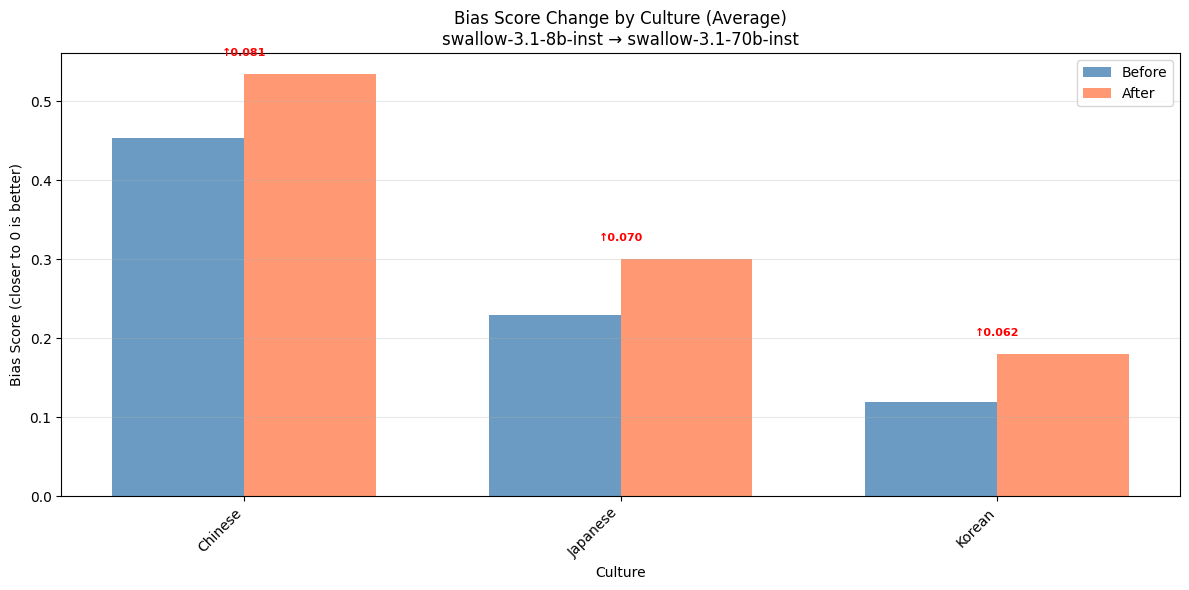

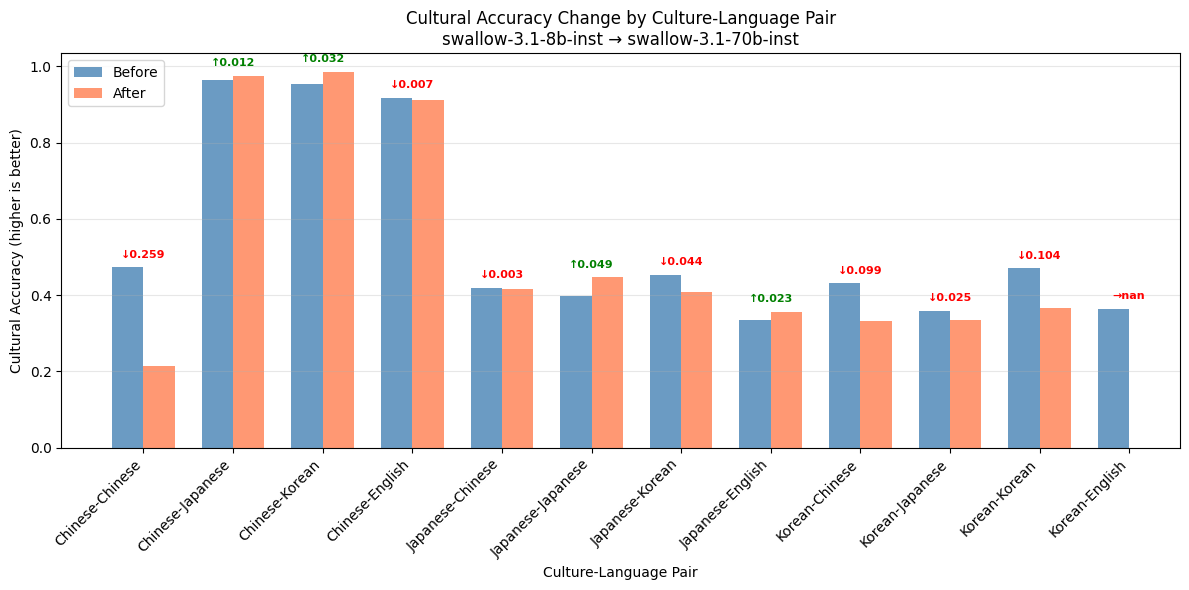

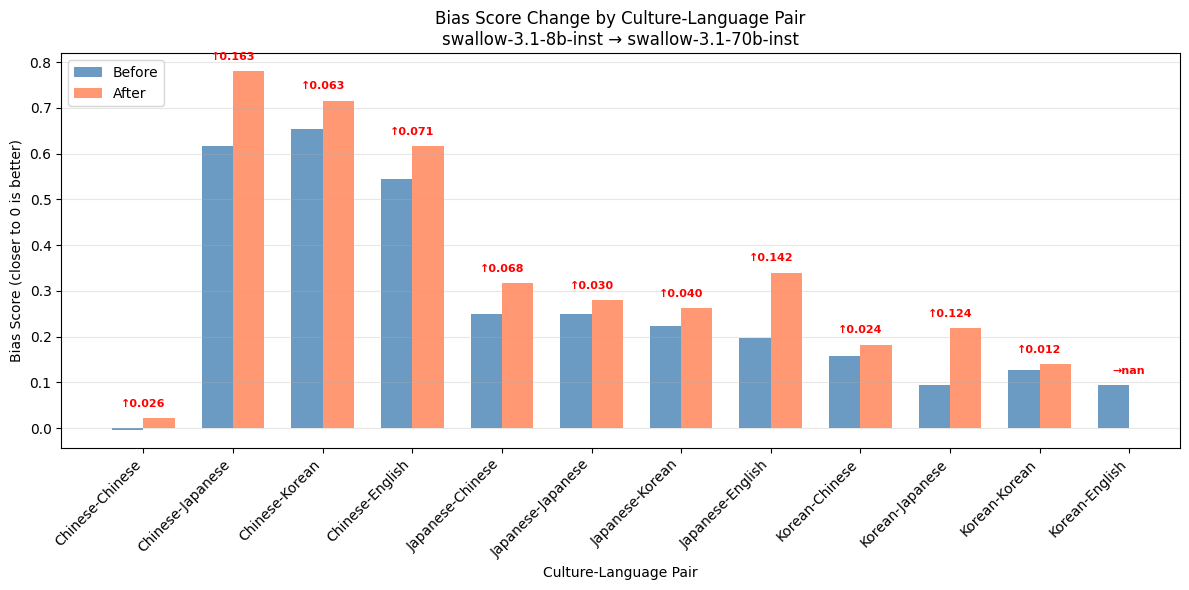

In [10]:
shift_comparison(
    df,
    before_model='swallow-3.1-8b-inst',
    after_model='swallow-3.1-70b-inst',
)
shift_comparison(
    df,
    before_model='swallow-3.1-8b-inst',
    after_model='swallow-3.1-70b-inst',
    group_by='culture',
    metric='bias',
)
shift_comparison(
    df,
    before_model='swallow-3.1-8b-inst',
    after_model='swallow-3.1-70b-inst',
    group_by='combo',
)
shift_comparison(
    df,
    before_model='swallow-3.1-8b-inst',
    after_model='swallow-3.1-70b-inst',
    group_by='combo',
    metric='bias',
)